In [89]:
%load_ext autoreload
%autoreload 2

import import_ipynb
import clean_data
import pandas as pd
import Modeling as model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
#collaps NPT features
dfs = clean_data.getDataFramesFromFiles('../CollegeScorecard_Raw_Data/')
clean_data.addYearAsLabel(dfs)
clean_data.dropUselessColumn(dfs)
clean_data.convertUnknownsToNans(dfs)
clean_data.dropColsAllNans(dfs)

In [159]:
merged_df = clean_data.intersection_and_merge(dfs)
merged_df = clean_data.convertMixedDataTypes(merged_df)
merged_df = clean_data.combine_avg_net_price(merged_df)

In [160]:
merged_df = clean_data.bin_degree(merged_df)

In [161]:
merged_df = clean_data.fill_col(merged_df)

In [162]:
merged_df = clean_data.oneHotEncoding(merged_df)

In [168]:
merged_df['Year'].unique()

array([2003, 2005, 2007, 2009, 2011, 2012, 2013, 2014])

In [166]:
merged_df = clean_data.dropYears(merged_df)

In [167]:
print(merged_df)

       AANAPII  ADM_RATE   AGEGE24  AGE_ENTRY  ANNHI    AVGFACSAL  \
29624      0.0  0.445700  0.120000  21.296296    0.0  4991.000000   
29625      0.0  0.804900  0.260000  22.980490    0.0  6734.000000   
29626      0.0  0.682057  0.870000  33.572347    0.0  3043.000000   
29627      0.0  0.875600  0.270000  23.485567    0.0  6257.000000   
29628      0.0  0.504200  0.100000  21.090276    0.0  5017.000000   
29629      0.0  0.867000  0.110000  21.283108    0.0  6551.000000   
29630      0.0  0.682057  0.450000  25.912446    0.0  4196.000000   
29631      0.0  0.682057  0.560000  28.943627    0.0  6157.000000   
29632      0.0  0.991700  0.290000  23.637778    0.0  5708.000000   
29633      0.0  0.776000  0.060000  20.509892    0.0  7151.000000   
29634      0.0  0.885200  0.020000  19.702179    0.0  6111.000000   
29635      0.0  0.682057  0.550000  27.008856    0.0  4827.000000   
29636      0.0  0.682057  0.480000  28.438628    0.0  4598.000000   
29637      0.0  1.000000  0.630000

In [109]:
#merged_df = clean_data.oneHotEncoding(merged_df)
columns_one_hot = ['STABBR', 'PREDDEG', 'CONTROL', 'HIGHDEG', 'ICLEVEL', 'OPENADMP', 'OPEFLAG', 'SCH_DEG']
for c in columns_one_hot:
    pd.get_dummies(merged_df[c], prefix=c)
    merged_df = pd.concat([merged_df, pd.get_dummies(merged_df[c], prefix=c)],axis=1)
    merged_df = merged_df.drop([c],axis=1, inplace=True)

       AANAPII  ADM_RATE  AGEGE24  AGE_ENTRY  ANNHI  AVGFACSAL  \
0          NaN       NaN      NaN        NaN    NaN     4285.0   
1          NaN       NaN      NaN        NaN    NaN     5988.0   
2          NaN       NaN      NaN        NaN    NaN     2962.0   
3          NaN       NaN      NaN        NaN    NaN     5385.0   
4          NaN       NaN      NaN        NaN    NaN     4216.0   
5          NaN       NaN      NaN        NaN    NaN     5595.0   
6          NaN       NaN      NaN        NaN    NaN     4169.0   
7          NaN       NaN      NaN        NaN    NaN     5061.0   
8          NaN       NaN      NaN        NaN    NaN     4852.0   
9          NaN       NaN      NaN        NaN    NaN     5519.0   
10         NaN       NaN      NaN        NaN    NaN     5000.0   
11         NaN       NaN      NaN        NaN    NaN     4206.0   
12         NaN       NaN      NaN        NaN    NaN     3434.0   
13         NaN       NaN      NaN        NaN    NaN     1638.0   
14        

TypeError: 'NoneType' object is not subscriptable

In [79]:
df = merged_df[['NPT4_048_PUB', 'NPT41_PUB', 'NPT42_PUB']].dropna(how='all')
df_sum = df['NPT41_PUB'] + df['NPT42_PUB']
df = pd.concat([df['NPT4_048_PUB'], df_sum], axis=1)
df.isna().sum()
 
#merged_df[['NPT4_048_PUB', 'NPT41_PUB', 'NPT42_PUB']].isna().sum()

NPT4_048_PUB      0
0               860
dtype: int64

In [77]:
df = merged_df[['NPT4_048_PRIV', 'NPT41_PRIV', 'NPT42_PRIV']].dropna(how='all')
df_sum = df['NPT41_PRIV'] + df['NPT42_PRIV']
df = pd.concat([df['NPT4_048_PRIV'], df_sum], axis=1)
df.isna().sum()

NPT4_048_PRIV       0
0                1643
dtype: int64

In [71]:
df = merged_df[['NPT4_048_PROG', 'NPT41_PROG', 'NPT42_PROG']].dropna(how='all')
df

,NPT4_048_PROG,NPT41_PROG,NPT42_PROG
55076,4524.0,4524.0,5136.0
55078,13142.0,13143.0,13143.0
55079,25475.0,25344.0,26246.0
55081,8509.0,8400.0,8916.0
55082,20492.0,20350.0,21070.0
55083,29391.0,29060.0,31780.0
55084,20636.0,19800.0,22644.0
55086,19785.0,19734.0,20306.0
55093,15631.0,14796.0,16920.0
55095,23973.0,23076.0,27792.0


In [57]:
merged_df[['NPT43_PUB', 'NPT4_3075_PUB']].isna().sum()

NPT43_PUB        79351
NPT4_3075_PUB    78863
dtype: int64

In [157]:
print(merged_df['Year'].unique)

TypeError: 'set' object is not subscriptable

In [189]:
merged_df = clean_data.runAll()

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [190]:
merged_df_no_id = merged_df.drop('UNITID', axis=1)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


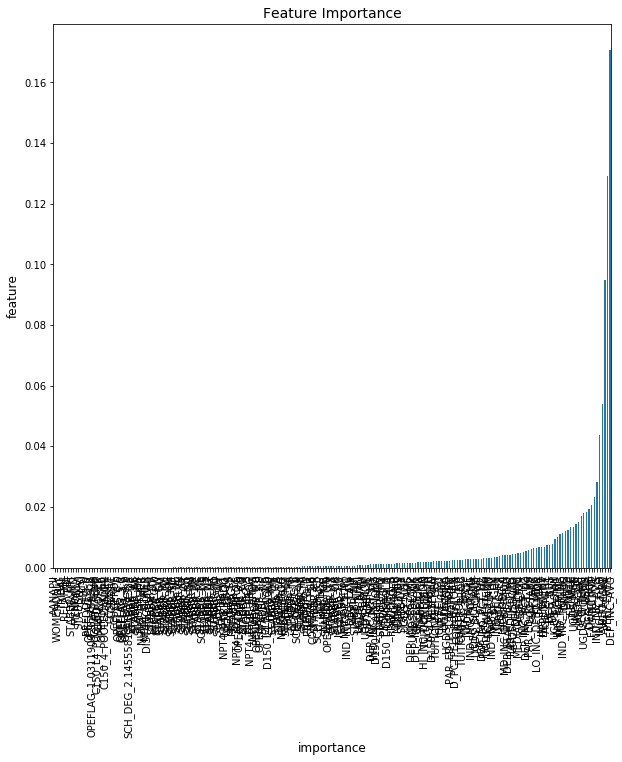

In [169]:
target = 'MD_EARN_WNE_P6'

train, test = model.sampling_data(merged_df_no_id)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)
est = 14
sel = 1

model.graph_feature_importance(x_train, y_train, x_test, est, model.RF)

In [202]:
rf_feature_importance = model.create_random_forest(x_train, y_train, x_test, est)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [205]:
np.sort(rf_feature_importance)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.35562398e-09, 2.89896310e-08, 2.97851239e-08,
       1.15096359e-07, 3.53528765e-07, 1.42279713e-06, 1.70172238e-06,
       3.15123368e-06, 4.35092585e-06, 4.50288209e-06, 1.03943279e-05,
       1.14126974e-05, 1.41828791e-05, 1.65177031e-05, 2.17640755e-05,
       2.52563133e-05, 2.80656854e-05, 2.86812310e-05, 3.28004849e-05,
       3.66489680e-05, 4.52085608e-05, 4.94980707e-05, 5.45682688e-05,
       5.52734967e-05, 5.68117849e-05, 6.50863158e-05, 6.82921694e-05,
      

In [146]:
merged_df.columns.to_list()

['AANAPII',
 'ADM_RATE',
 'AGEGE24',
 'AGE_ENTRY',
 'ANNHI',
 'AVGFACSAL',
 'C150_4_POOLED_SUPP',
 'C150_L4_POOLED_SUPP',
 'CCBASIC',
 'CCSIZSET',
 'CCUGPROF',
 'COSTT4_A',
 'COSTT4_P',
 'CURROPER',
 'D150_4_AIANOLD',
 'D150_4_HISPOLD',
 'D150_L4_AIANOLD',
 'D150_L4_HISPOLD',
 'DEPENDENT',
 'DEP_INC_AVG',
 'DEP_INC_PCT_H1',
 'DEP_INC_PCT_H2',
 'DEP_INC_PCT_LO',
 'DEP_INC_PCT_M1',
 'DEP_INC_PCT_M2',
 'DEP_STAT_PCT_IND',
 'DISTANCEONLY',
 'D_PCTPELL_PCTFLOAN',
 'FAMINC',
 'FAMINC_IND',
 'FEMALE',
 'FIRST_GEN',
 'GRADS',
 'HBCU',
 'HI_INC_DEBT_MDN',
 'HSI',
 'INC_PCT_H1',
 'INC_PCT_H2',
 'INC_PCT_LO',
 'INC_PCT_M1',
 'INC_PCT_M2',
 'IND_INC_AVG',
 'IND_INC_PCT_H1',
 'IND_INC_PCT_H2',
 'IND_INC_PCT_LO',
 'IND_INC_PCT_M1',
 'IND_INC_PCT_M2',
 'INEXPFTE',
 'LO_INC_DEBT_MDN',
 'MD_EARN_WNE_P6',
 'MD_FAMINC',
 'MD_INC_DEBT_MDN',
 'MEDIAN_HH_INC',
 'MENONLY',
 'NANTI',
 'NPT45_PROG',
 'NPT4_048_PROG',
 'NPT4_3075_PROG',
 'NPT4_75UP_PROG',
 'NPT4_OTHER',
 'NPT4_PRIV',
 'NPT4_PROG',
 'NPT4_PUB',


In [222]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
k = 20

x = merged_df_no_id.drop([target], axis=1)
y = merged_df_no_id[target]
selector = SelectKBest(f_regression, k)
selector.fit(x, y)
# Get columns to keep
cols = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
features_df_new = x.iloc[:,cols]
features_df_new.columns

//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encou

Index(['AVGFACSAL', 'DEP_INC_AVG', 'DEP_INC_PCT_LO', 'FAMINC', 'FAMINC_IND',
       'FIRST_GEN', 'INC_PCT_H2', 'INC_PCT_LO', 'IND_INC_AVG',
       'IND_INC_PCT_LO', 'MD_FAMINC', 'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_HS',
       'PAR_ED_PCT_PS', 'PELL_EVER', 'PREDDEG_3', 'HIGHDEG_4', 'ICLEVEL_1.0',
       'OPENADMP_1.0', 'SCH_DEG_3.0'],
      dtype='object')

Text(0.5, 1, 'Correlation matrix of top 20 features with f_regression')

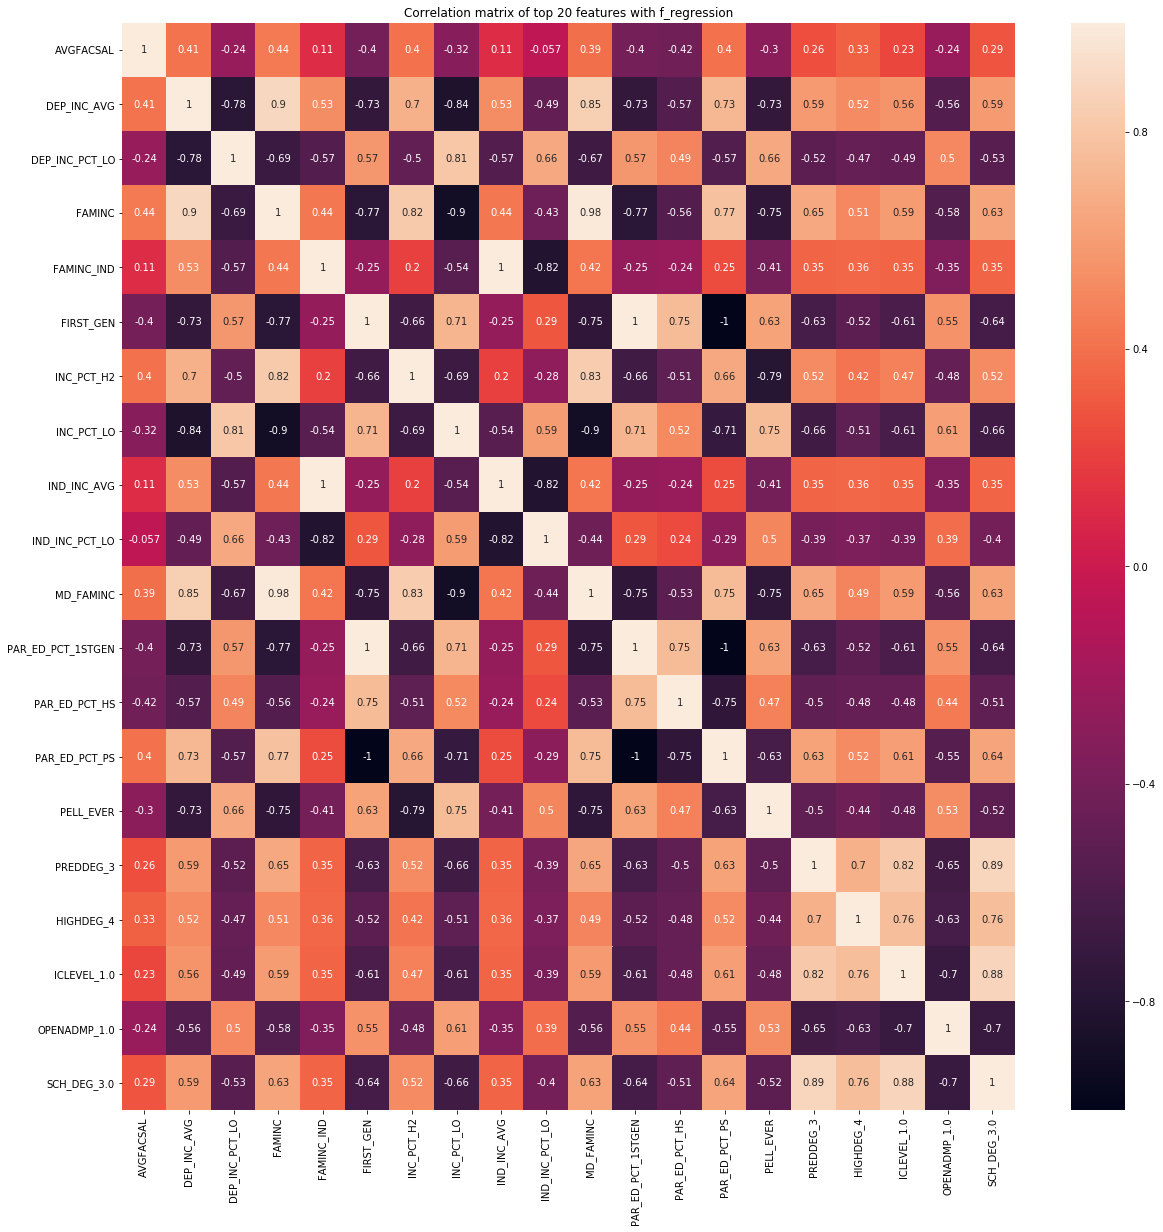

In [226]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(merged_df_no_id[features_df_new.columns].corr(), annot=True)
plt.title('Correlation matrix of top ' + str(k) + ' features with f_regression')
plt.savefig('Correlation matrix of top 20 features with f_regression')

It is desirable to remove correlated features to prevent Multicollinearity in linear models

In [219]:
from sklearn.feature_selection import mutual_info_regression

x = merged_df_no_id.drop([target], axis=1)
y = merged_df_no_id[target]
selector = SelectKBest(mutual_info_regression, k)
selector.fit(x, y)
# Get columns to keep
cols = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
features_df_new = x.iloc[:,cols]
features_df_new.columns

Index(['DEP_INC_AVG', 'DEP_INC_PCT_LO', 'DEP_INC_PCT_M1', 'FAMINC',
       'FAMINC_IND', 'FIRST_GEN', 'INC_PCT_H1', 'INC_PCT_H2', 'INC_PCT_LO',
       'INC_PCT_M1', 'INC_PCT_M2', 'IND_INC_AVG', 'IND_INC_PCT_LO',
       'IND_INC_PCT_M1', 'MD_FAMINC', 'MD_INC_DEBT_MDN', 'PAR_ED_PCT_1STGEN',
       'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS', 'PELL_EVER'],
      dtype='object')

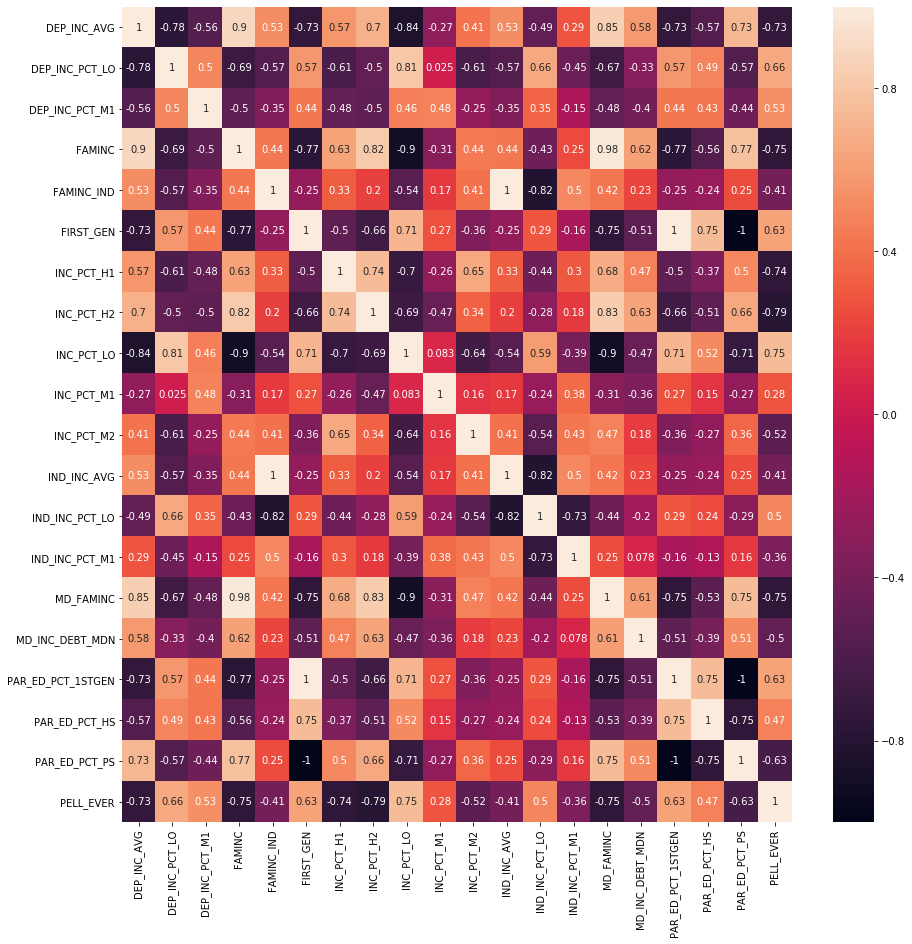

In [220]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(merged_df_no_id[features_df_new.columns].corr(), annot=True)

In [10]:
preds = model.create_random_forest(x_train, y_train, x_test, est)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, preds)

ValueError: Found input variables with inconsistent numbers of samples: [4232, 205]

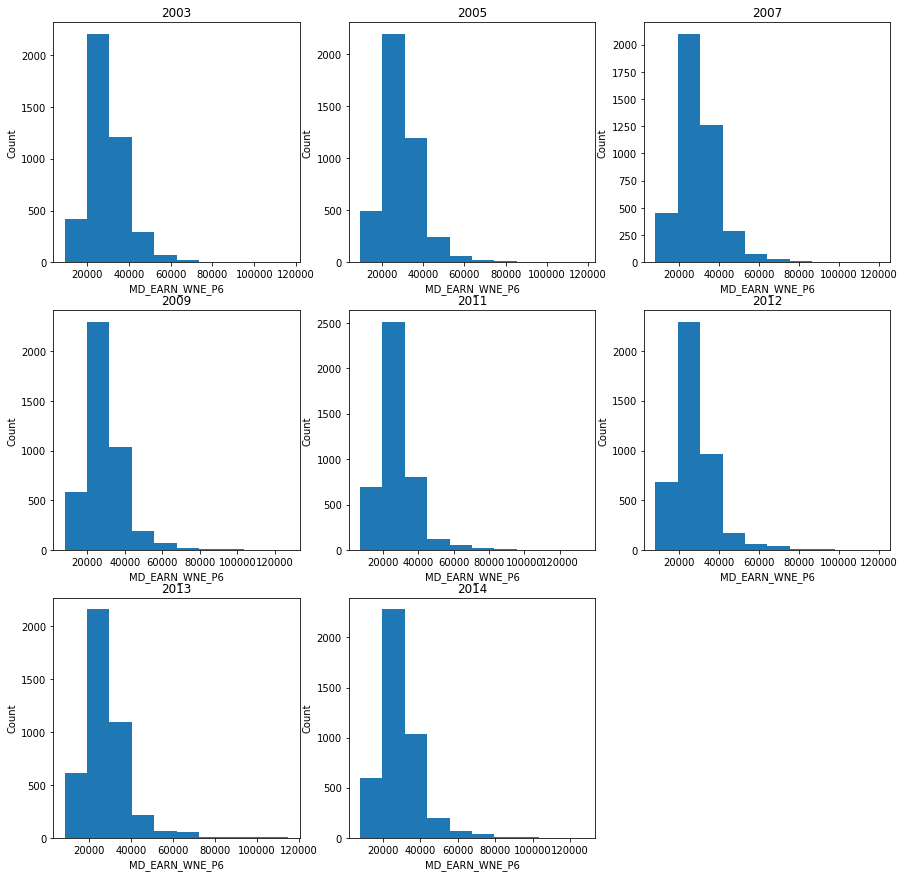

In [86]:
#Data Exploration
unique_years = set(merged_df['Year'])
unique_years.remove(1996)
unique_years.remove(1997)
unique_years.remove(1998)
unique_years.remove(1999)
unique_years.remove(2000)
unique_years.remove(2001)
unique_years.remove(2002)
unique_years.remove(2004)
unique_years.remove(2006)
unique_years.remove(2008)
unique_years.remove(2010)
unique_years.remove(2015)
unique_years.remove(2016)
unique_years.remove(2017)


index = 331
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for y in unique_years:
    plt.subplot(index)
    plt.title(y)
    plt.ylabel('Count')
    plt.xlabel(target)
    plt.hist(merged_df.loc[merged_df['Year'] == y][target])
    index += 1

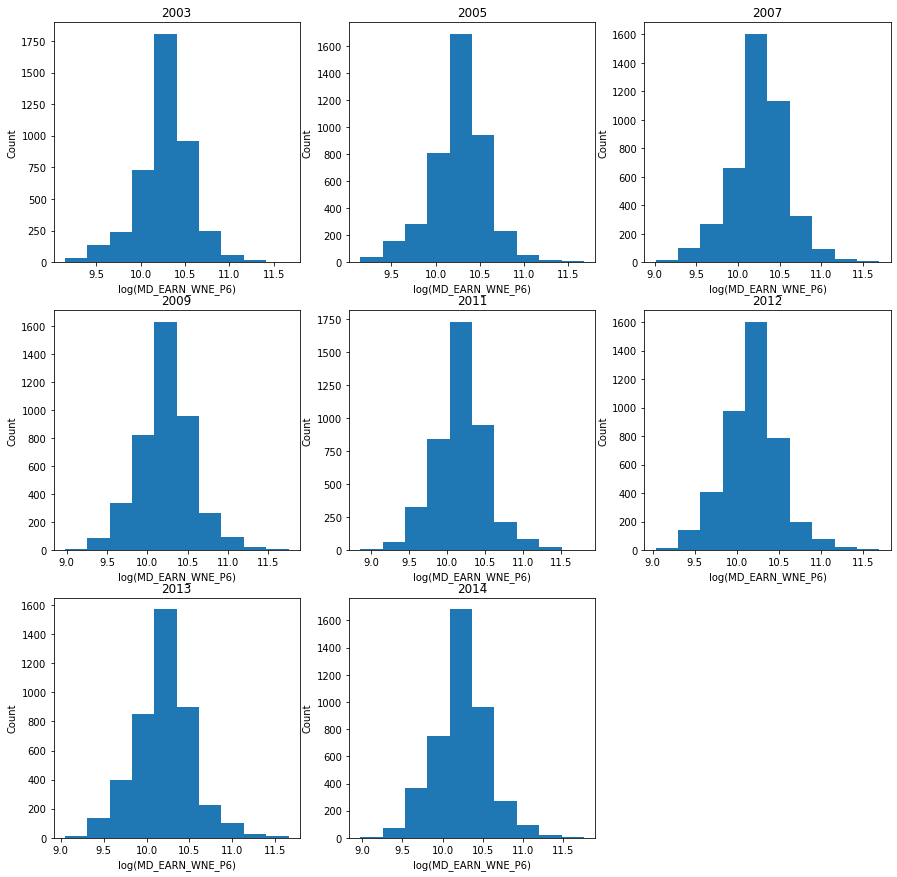

In [73]:
index = 331  
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for y in unique_years:
    plt.subplot(index)
    plt.title(y)
    plt.ylabel('Count')
    plt.xlabel('log(' + target + ')')
    plt.hist(np.log(merged_df.loc[merged_df['Year'] == y][target]))
    index += 1

Consider transforming the target variable and observe impact on mean absolute error or median abosolute error. This should help with linear models. Is random forest linear? what models are linear?
Run models and compare error
https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html
https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va

Generate covariance or correctlations for highest feature importances

https://scikit-learn.org/stable/modules/feature_selection.html


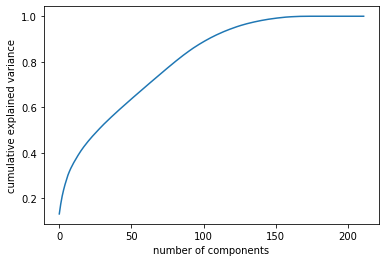

In [195]:
#PCA
from sklearn.preprocessing import StandardScaler

x = merged_df.drop(['Year'], axis=1)
y = merged_df['Year']
x = StandardScaler().fit_transform(x)
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

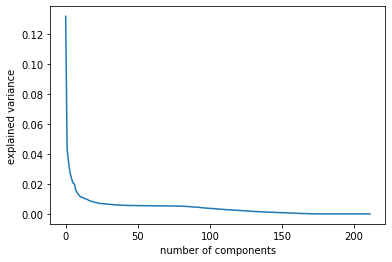

In [196]:
plt.xlabel('number of components')
plt.ylabel('explained variance');
plt.plot(pca.explained_variance_ratio_)